<a href="https://colab.research.google.com/github/alijablack/data-science/blob/main/Neural_Networks_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Networks Image Classification

### Import Data

This dataset includes hundreds of images of cats and dogs retrieved from Google images.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle

pickle_in = open("/content/drive/My Drive/Copy of X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("/content/drive/My Drive/Copy of y.pickle","rb")
y = pickle.load(pickle_in)

In [ ]:
X = X/255.0
y = np.array(y)

### Fit Model

In [ ]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
#model.add(Dense(64))
#model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, 
          batch_size=32, 
          epochs=8, 
          validation_split=0.3)

Epoch 1/8
546/546 [==============================] - 37s 67ms/step - loss: 0.6771 - accuracy: 0.5719 - val_loss: 0.6263 - val_accuracy: 0.6625
Epoch 2/8
546/546 [==============================] - 37s 68ms/step - loss: 0.5648 - accuracy: 0.7119 - val_loss: 0.5263 - val_accuracy: 0.7366
Epoch 3/8
546/546 [==============================] - 37s 67ms/step - loss: 0.4724 - accuracy: 0.7792 - val_loss: 0.4584 - val_accuracy: 0.7863
Epoch 4/8
546/546 [==============================] - 37s 67ms/step - loss: 0.4137 - accuracy: 0.8120 - val_loss: 0.4270 - val_accuracy: 0.8075
Epoch 5/8
546/546 [==============================] - 37s 67ms/step - loss: 0.3714 - accuracy: 0.8334 - val_loss: 0.4019 - val_accuracy: 0.8258
Epoch 6/8
546/546 [==============================] - 37s 67ms/step - loss: 0.3281 - accuracy: 0.8553 - val_loss: 0.4060 - val_accuracy: 0.8201
Epoch 7/8
546/546 [==============================] - 37s 67ms/step - loss: 0.2914 - accuracy: 0.8744 - val_loss: 0.4055 - val_accuracy: 0.8300

In [ ]:
# attempt to visualize training accuracy vs. validation accuracy
loss_train = history.history['acc']
loss_val = history.history['val_acc']
epochs = range(1,8)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The model accuracy increased with each epoch. Epoch 8 had the highest accuracy with roughly 84%.

Save model to disk

In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/Project 6')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Project 6/assets


Load model from disk

In [ ]:
model_2 = tf.keras.models.load_model("/content/drive/My Drive/Colab Notebooks/Project 6/model")

### Classify unknown images with model

In [ ]:
CATEGORIES = ["Dog", "Cat"]  # will use this to convert prediction num to string value

def prepare(filepath):
    IMG_SIZE = 100  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # return the image with shaping that TF wants.

#### Cats

Let's upload an image of a furry kitten to start. We see it is correctly identified as a cat.

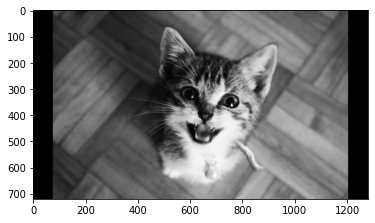

In [ ]:
filepath = '/content/drive/My Drive/Colab Notebooks/Project 6/cat.jpeg'

X_in = prepare(filepath)

img_array = cv2.imread(filepath ,cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array, cmap='gray')
plt.show()

In [ ]:
prediction = model.predict([X_in])
prediction

array([[1.]], dtype=float32)

In [ ]:
print(CATEGORIES[int(prediction[0][0])])

Cat


When processing an image of a member of the feline family, a lion, the model misidentifies the lion as a dog- perhaps due to its mane and size.

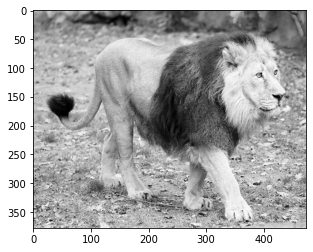

In [ ]:
filepath_1 = '/content/drive/My Drive/Colab Notebooks/Project 6/lion.jpeg'

X_in_1 = prepare(filepath_1)

img_array = cv2.imread(filepath_1 ,cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array, cmap='gray')
plt.show()

In [ ]:
prediction = model.predict([X_in_1])
prediction

array([[0.]], dtype=float32)

In [ ]:
print(CATEGORIES[int(prediction[0][0])])

Dog


When inputting the hairless Sphynx cat, the model is still able to identify its features as cat-like.

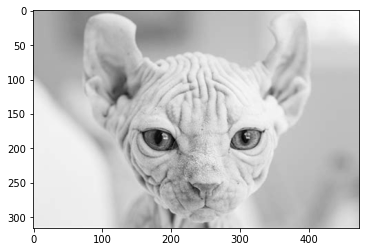

In [ ]:
filepath_5 = '/content/drive/My Drive/Colab Notebooks/Project 6/sphynx.jpeg'

X_in_5 = prepare(filepath_5)

img_array = cv2.imread(filepath_5 ,cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array, cmap='gray')
plt.show()

In [ ]:
prediction = model.predict([X_in_5])
prediction

array([[1.]], dtype=float32)

In [ ]:
print(CATEGORIES[int(prediction[0][0])])

Cat


An image of a black cat is also correctly identified as a cat.

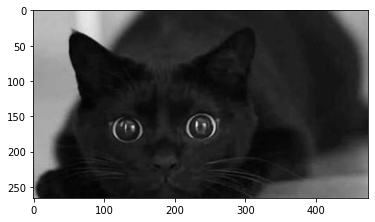

In [ ]:
filepath_7 = '/content/drive/My Drive/Colab Notebooks/Project 6/black cat.jpeg'

X_in_7 = prepare(filepath_7)

img_array = cv2.imread(filepath_7 ,cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array, cmap='gray')
plt.show()

In [ ]:
prediction = model.predict([X_in_7])
prediction

array([[1.]], dtype=float32)

In [ ]:
print(CATEGORIES[int(prediction[0][0])])

Cat


The cartoon image of a cat from the animated film, Secret Life of Pets, is also correctly identified as a cat.

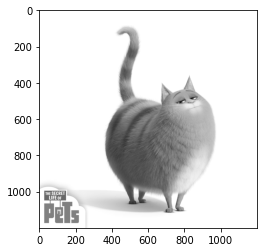

In [ ]:
filepath_11 = '/content/drive/My Drive/Colab Notebooks/Project 6/secret life of pets.jpeg'

X_in_11 = prepare(filepath_11)

img_array = cv2.imread(filepath_11 ,cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array, cmap='gray')
plt.show()

In [ ]:
prediction = model.predict([X_in_11])
prediction

array([[1.]], dtype=float32)

In [ ]:
print(CATEGORIES[int(prediction[0][0])])

Cat


I wonder if a panther, a member of the feline family without a mane would be correctly identified as a cat? The model identifies the panther as a dog, perhaps due to its size.

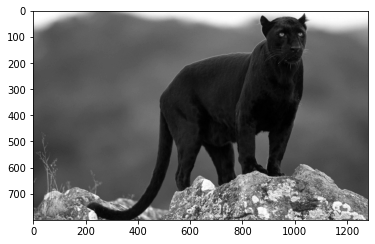

In [ ]:
filepath_13 = '/content/drive/My Drive/Colab Notebooks/Project 6/panther.jpeg'

X_in_13 = prepare(filepath_13)

img_array = cv2.imread(filepath_13 ,cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array, cmap='gray')
plt.show()

In [ ]:
prediction = model.predict([X_in_13])
prediction

array([[0.]], dtype=float32)

In [ ]:
print(CATEGORIES[int(prediction[0][0])])

Dog


#### Dogs

Let's input a silly picture of a dog sneezing. Will the model still be able to identify a dog with its features distorted and its ears back in this image? Yes, the model correctly identifies the dog.

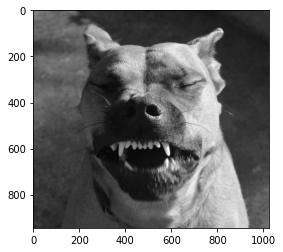

In [ ]:
filepath_2 = '/content/drive/My Drive/Colab Notebooks/Project 6/dog sneezing.jpeg'

X_in_2 = prepare(filepath_2)

img_array = cv2.imread(filepath_2 ,cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array, cmap='gray')
plt.show()

In [ ]:
prediction = model.predict([X_in_2])
prediction

array([[0.]], dtype=float32)

In [ ]:
print(CATEGORIES[int(prediction[0][0])])

Dog


When inputting a member of the canine family, a coyote, the model identifies the coyote as a dog.

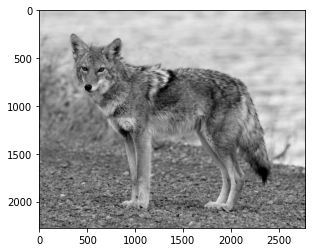

In [ ]:
filepath_4 = '/content/drive/My Drive/Colab Notebooks/Project 6/coyote.jpeg'

X_in_4 = prepare(filepath_4)

img_array = cv2.imread(filepath_4 ,cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array, cmap='gray')
plt.show()

In [ ]:
prediction = model.predict([X_in_4])
prediction

array([[0.]], dtype=float32)

In [ ]:
print(CATEGORIES[int(prediction[0][0])])

Dog


How about a miniature schnauzer, to test how a smaller dog is identified by the model? The model is able to correctly identify the schnauzer as a dog.

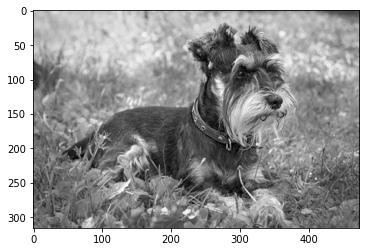

In [ ]:
filepath_8 = '/content/drive/My Drive/Colab Notebooks/Project 6/schnauzer.jpeg'

X_in_8 = prepare(filepath_8)

img_array = cv2.imread(filepath_8 ,cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array, cmap='gray')
plt.show()

In [ ]:
prediction = model.predict([X_in_8])
prediction

array([[0.]], dtype=float32)

In [ ]:
print(CATEGORIES[int(prediction[0][0])])

Dog


A cartoon image of a dog with a cone around its neck is incorrectly classified as a cat.

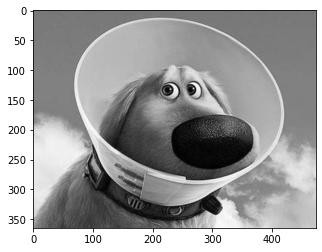

In [ ]:
filepath_10 = '/content/drive/My Drive/Colab Notebooks/Project 6/cone of shame.jpeg'

X_in_10 = prepare(filepath_10)

img_array = cv2.imread(filepath_10 ,cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array, cmap='gray')
plt.show()

In [ ]:
prediction = model.predict([X_in_10])
prediction

array([[1.]], dtype=float32)

In [ ]:
print(CATEGORIES[int(prediction[0][0])])

Cat


Let's see if the model is able to correctly identify another cartoon image of a dog, without an obstruction around the facial features. 

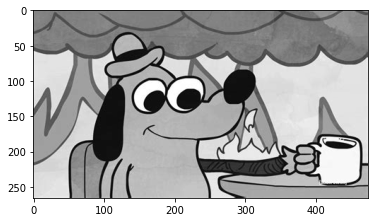

In [ ]:
filepath_14 = '/content/drive/My Drive/Colab Notebooks/Project 6/fine.jpeg'

X_in_14 = prepare(filepath_14)

img_array = cv2.imread(filepath_14 ,cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array, cmap='gray')
plt.show()

In [ ]:
prediction = model.predict([X_in_14])
prediction

array([[0.]], dtype=float32)

In [ ]:
print(CATEGORIES[int(prediction[0][0])])

Dog


The model is able to correctly identify a cartoon dog with a tophat as a dog.

An additional experiment with an image of a wolf that I predict will be identified as a dog. [Moved project folder to shared folder, must update filepaths]

In [ ]:
filepath_16 = '/content/drive/My Drive/Exercises - Alija/Week 12/Project 6/wolf.jpeg'

X_in_16 = prepare(filepath_16)

img_array = cv2.imread(filepath_16 ,cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array, cmap='gray')
plt.show()

In [ ]:
prediction = model.predict([X_in_16])
prediction

In [ ]:
print(CATEGORIES[int(prediction[0][0])])

#### Neither

Let's examine what happens when we input images that are of neither a cat nor a dog.

First input, upcoming Cat Woman actress, Zoe Kravitz. Would a computer have cast her for her cat-like qualities?

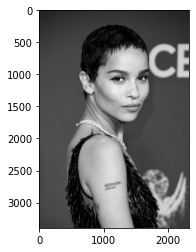

In [ ]:
filepath_3 = '/content/drive/My Drive/Colab Notebooks/Project 6/zoe.jpeg'

X_in_3 = prepare(filepath_3)

img_array = cv2.imread(filepath_3 ,cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array, cmap='gray')
plt.show()

In [ ]:
prediction = model.predict([X_in_3])
prediction

array([[0.]], dtype=float32)

In [ ]:
print(CATEGORIES[int(prediction[0][0])])

Dog


Using computer vision, the model does not see a close resemblance between cats and the Cat Woman actress. How about Miles Morales, Spiderman animation- is Spiderman more cat or dog-like according to the model?

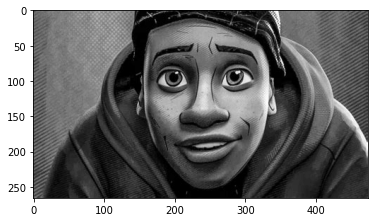

In [ ]:
filepath_6 = '/content/drive/My Drive/Colab Notebooks/Project 6/miles.jpeg'

X_in_6 = prepare(filepath_6)

img_array = cv2.imread(filepath_6 ,cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array, cmap='gray')
plt.show()

In [ ]:
prediction = model.predict([X_in_6])
prediction

array([[0.]], dtype=float32)

In [ ]:
print(CATEGORIES[int(prediction[0][0])])

Dog


The computer is unable to categorize an input as anything other than a cat or dog. The Spiderman animation is seen as more closely resembling a dog using this model. How is a giraffe identified by this algorithm?

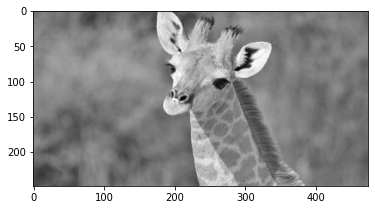

In [ ]:
filepath_12 = '/content/drive/My Drive/Colab Notebooks/Project 6/giraffe.jpeg'

X_in_12 = prepare(filepath_12)

img_array = cv2.imread(filepath_12 ,cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array, cmap='gray')
plt.show()

In [ ]:
prediction = model.predict([X_in_12])
prediction

array([[1.]], dtype=float32)

In [ ]:
print(CATEGORIES[int(prediction[0][0])])

Cat


A giraffe is categorized for as a cat, bearing more cat-like features according to the model. How is a cow viewed within this system?

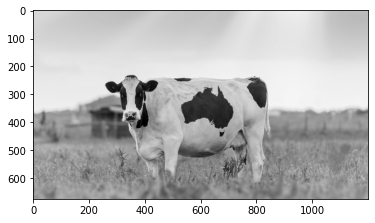

In [ ]:
filepath_16 = '/content/drive/My Drive/Colab Notebooks/Project 6/cow.jpeg'

X_in_16 = prepare(filepath_16)

img_array = cv2.imread(filepath_16 ,cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array, cmap='gray')
plt.show()

In [ ]:
prediction = model.predict([X_in_16])
prediction

array([[0.]], dtype=float32)

In [ ]:
print(CATEGORIES[int(prediction[0][0])])

Dog


A cow is classified as a dog in this model.

Additional test with an elephant that I predict will be identified as more dog-like due to its size. [Moved project folder to shared folder, must update filepaths]

In [ ]:
filepath_24 = '/content/drive/My Drive/Exercises - Alija/Week 12/Project 6/elephant.jpeg'

X_in_24 = prepare(filepath_24)

img_array = cv2.imread(filepath_24 ,cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array, cmap='gray')
plt.show()

In [ ]:
prediction = model.predict([X_in_24])
prediction

In [ ]:
print(CATEGORIES[int(prediction[0][0])])

## Conclusions

The model performs with ~84% accuracy on identifying a cat or a dog correctly. This worked fairly well on animated images of cats or dogs. However, if a dog had something like a cone around its head, it was misidentified. When inputting images of species within the broader canine and feline families, such as coyotes or lions, the model does not perform as consistently in correctly identifying them as cat or dog. With that said, the model is unable to identify images as anything other than a cat or a dog. By testing different inputs that were not cats or dogs, the model analyzed each input for its cat or dog-like features, informed by the images it was trained on. 